# Presentation: Data Exploration and Findings using Prosper Loan Data
## by Ziming Chen

## Investigation Overview

> Find out the factors that influence whether or not people decide to have a loan

## Dataset Overview

> there are 81 columns in the dataset which can be categorized into 3 parts:
1. Account information: ListingKey,ListingNumber,LoanNumber, LoanOriginalAmount and etc
2. Personal information: Occupation, EmploymentStatus, IncomeRange, IncomeVerifiable and etc
3. Monetary information: BorrowerRate, LP_InterestandFees, LP_NetPrincipalLoss, EstimatedReturn and etc

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## What is the relationship between the borrower's state and brrower's interest rate



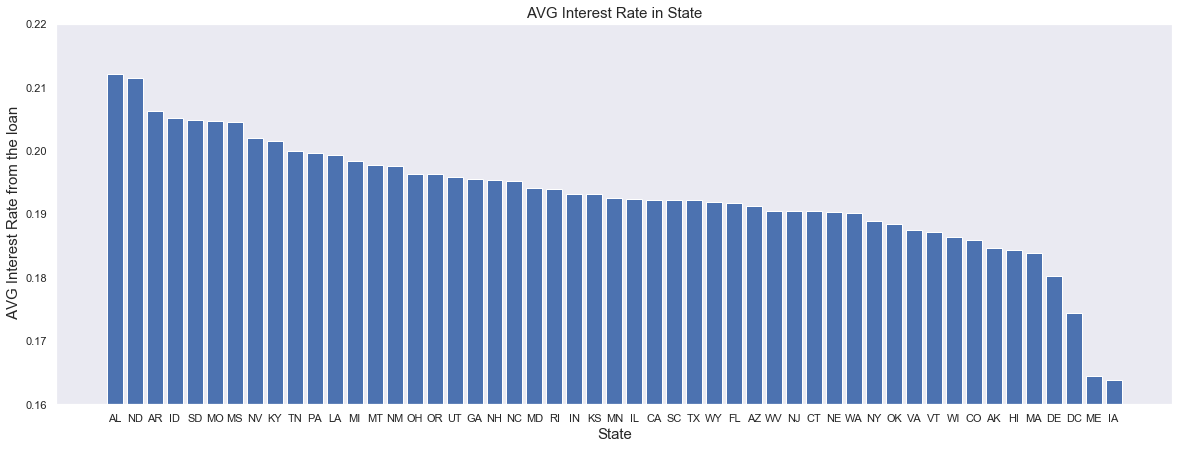

In [5]:
state_interest = df[['BorrowerRate','BorrowerState']]
state_interest.dropna(inplace = True)
mean_state_interest = state_interest.groupby('BorrowerState')['BorrowerRate'].mean()
mean_state_interest = mean_state_interest.sort_values(ascending = False)
# plot the bar chart
sb.set(style='darkgrid')
ax, fig = plt.subplots(figsize = (20,7))
plt.bar(mean_state_interest.index, mean_state_interest)
plt.ylim(0.16,0.22)
plt.xlabel('State',size = 15)
plt.ylabel(' AVG Interest Rate from the loan',size = 15)
plt.title('AVG Interest Rate in State',size = 15)
plt.grid()

## How can employement status affect the loan amount?

> While it is reasonable that employed people have a larger loan amount,not available, part-time, and retired people have the lowest loan amount

> More salary will lead to a higher probability of having loans. When peope have a house AND have more salary, the chance of having a loan is even higher.

> Interestingly, when people don't have a house, the number of people have a loan is lower. However, when people don't have a house but they are EXTREMELY wealthy (25,000-49,999) or EXTREMELY poor (1-24999), there is a higher probability that they have a loan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 2 columns):
EmploymentStatus      111682 non-null object
LoanOriginalAmount    113937 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


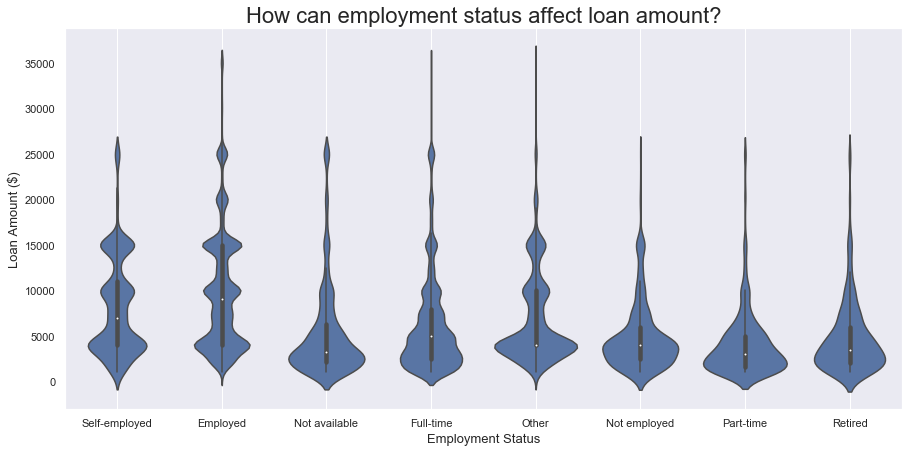

In [6]:
employ_loan = df[['EmploymentStatus','LoanOriginalAmount']]
employ_loan.info()
employ_loan = employ_loan.dropna()
plt.figure(figsize = (15,7))
color = sb.color_palette()[0]
sb.violinplot(data = employ_loan,x = 'EmploymentStatus', y = 'LoanOriginalAmount',color=color)
plt.xlabel('Employment Status',size = 13)
plt.ylabel('Loan Amount ($)',size = 13)
plt.title('How can employment status affect loan amount?',size = 22)
plt.grid()

## How do people balance monthly loan and monthly income?

> Self employed people have less loan but have a much ihger monthly income,one person even has 1M monthly income with a loan less than500 dollars per month

> When people have a stable income source and can show the proof of the income, people tend to have less borrow APR while having the simialr estimated return. This situation makes sense because lender would take more risks by lending the loans to the people who have an unstable source of income. In order to offset the risks, this type of people should take more APR in general.


<Figure size 2880x1440 with 0 Axes>

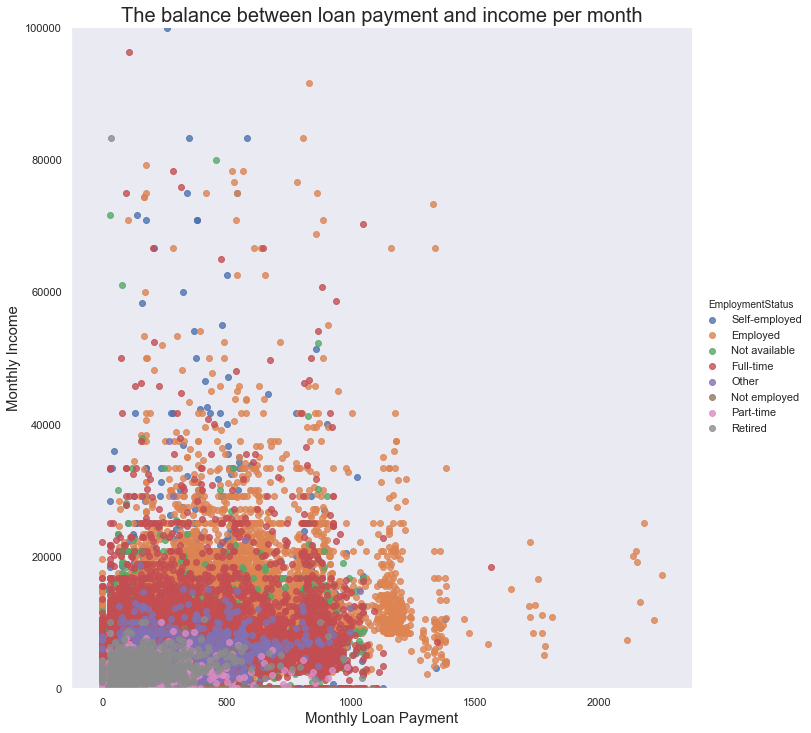

In [7]:
loan_income_employ = df[['MonthlyLoanPayment','StatedMonthlyIncome','EmploymentStatus']]
loan_income_employ = loan_income_employ.dropna()
# plot 
plt.figure(figsize = (40,20))
g = sb.FacetGrid(data = loan_income_employ,hue='EmploymentStatus',size = 10)
g= g.map(sb.regplot,'MonthlyLoanPayment','StatedMonthlyIncome',x_jitter = 0.03,fit_reg=False)
g.add_legend()
plt.ylim(0,100000)
plt.xlabel('Monthly Loan Payment',size = 15)
plt.ylabel('Monthly Income',size = 15)
plt.title('The balance between loan payment and income per month',size =20)
plt.grid()

### understand the correlations present between features in the data in general

As shown in the graph, we can see that APR and estiamted return have a strong positive correlation while APR has negative correlation with other factors such as loan original amount and LP_ customer payments?

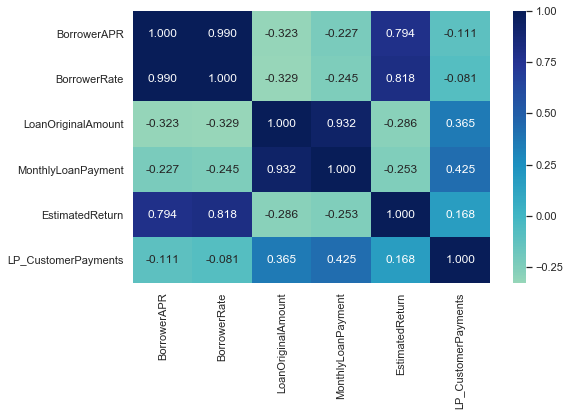

In [8]:
numeric_vars = ['BorrowerAPR','BorrowerRate','LoanOriginalAmount','MonthlyLoanPayment','EstimatedReturn','LP_CustomerPayments']
cate_vars = ['ProsperScore','IsBorrowerHomeowner','EmploymentStatus']
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', center = 0,cmap='YlGnBu')
plt.show()

In [ ]:
# ! jupyter nbconvert "slide_deck.ipynb" --to slides --post serve --template output_toggle